# Regressão Logística

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
%matplotlib inline

## Método para classificação binária

In [8]:
df = pd.read_csv('seguro.csv')
df.head()

,idade,seguro
0,10,0
1,11,0
2,12,0
3,13,0
4,14,0


In [9]:
reg = LogisticRegression(solver='lbfgs')
reg.fit(df[['idade']], df.seguro)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
reg.predict([[13], [26], [44], [64], [80]])

array([0, 0, 1, 1, 1], dtype=int64)

## Gerando o gráfico

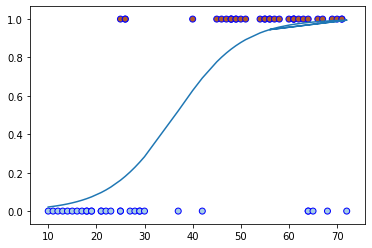

In [11]:
from scipy.optimize import curve_fit
import numpy as np

def f_sigmoide(x, x0, k):
    y = 1.0 / (1 + np.exp(-np.dot(k, x-x0)))
    return y

popt, pconv = curve_fit(f_sigmoide, df['idade'], df.seguro)
sigm1 = f_sigmoide(df['idade'], *popt)

plt.plot(df['idade'], sigm1)
plt.scatter(df['idade'], df.seguro, c=df.seguro, cmap='Paired', edgecolors='b')
plt.show()

## Gerando o gráfico utilizando função EXPIT

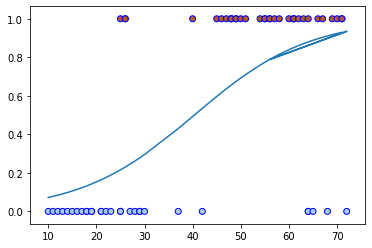

In [12]:
sigm2 = expit(df['idade'] * reg.coef_[0][0] + reg.intercept_[0])

plt.plot(df['idade'], sigm2)
plt.scatter(df['idade'], df.seguro, c=df.seguro, cmap='Paired', edgecolors='b')
plt.show()